<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/demos/workflow/PerformanceEvaluation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Model Evaluation With scikit-learn

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn import metrics

scikit-learn version: 0.22.2.post1


## Accuracy

In [4]:
# Define ground truth and prediction vectors
y_true = np.array([2, 0, 2, 2, 0, 1])
y_pred = np.array([0, 1, 2, 2, 0, 1])

In [5]:
# Using scikit-learn's accuracy_score() function
acc = metrics.accuracy_score(y_true, y_pred)

print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 66.67%


## Precision, recall and f1-score

In [6]:
# Using scikit-learn's precision_score() function
precision = metrics.precision_score(y_true, y_pred, average=None)

print(f'Precision: {precision}')

Precision: [0.5 0.5 1. ]


In [7]:
# Using scikit-learn's recall_score() function
recall = metrics.recall_score(y_true, y_pred, average=None)

print(f'Recall: {recall}')

Recall: [0.5        1.         0.66666667]


In [8]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.67         6
   macro avg       0.67      0.72      0.66         6
weighted avg       0.75      0.67      0.68         6



## Confusion matrix

In [9]:
conf_mat = metrics.confusion_matrix(y_true, y_pred)

print(conf_mat)

[[1 1 0]
 [0 1 0]
 [1 0 2]]


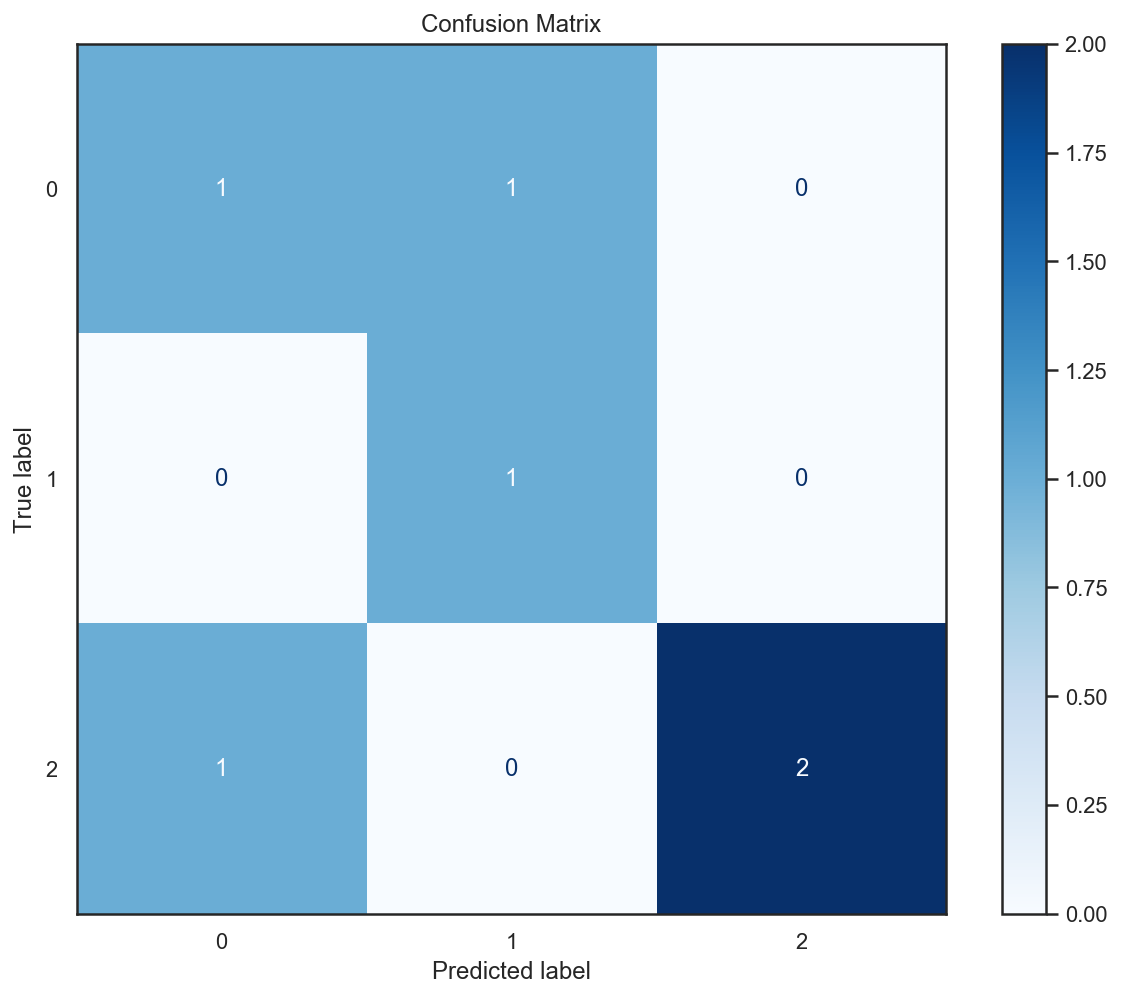

In [10]:
# plot_confusion_matrix() was introduced in scikit-learn 0.22
if sklearn.__version__ >= "0.22":
    # Temporary hide Seaborn grid lines
    with sns.axes_style('white'):
        # This is a low-level workaround because we have no scikit-learn classifier here
        # https://stackoverflow.com/a/59170865
        # See also https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                              display_labels=[0, 1, 2])

        disp = disp.plot(include_values=True,
                         cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal',)
        disp.ax_.set_title("Confusion Matrix")
        plt.show()